# Gender-Auswertung erste drei Republik-Jahre

Dieses Skript lädt Daten aus Google Sheets, erstellt einige deskriptive Statistiken und exportiert fixfertige csv-Dateien, die ins Publikator-Charttool reinkopiert werden können.

## Setup

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%matplotlib inline

## Daten laden

In [4]:
url = "https://docs.google.com/spreadsheets/d/1mnWP9D4VrU-Dxc4cnGNvs4Yf-a94Xs-3sZUyKDOu0Pk/gviz/tq?tqx=out:csv&sheet=Stories"

In [5]:
# df = pd.read_csv(url) For some reason this don't work
df = pd.read_csv('../data/data.csv')

**Einfachere Spaltennamen**

In [6]:
columns_new = [
    "formatRepoId",
    "repoId",
    "template",
    "Datum",
    "Jahr",
    "Format",
    "Titel",
    "Url",
    "Link",
    "Sachbearbeiterin",
    "Autorinnenzeile",
    "hatFrauen",
    "RolleFrauen",
    "hatTragendeFrauen",
    "nMännerExperten",
    "nFrauenExperten",
    "nMännerProtagonisten",
    "nFrauenProtagonisten",
    "Schwierigkeiten"
]

In [7]:
column_converter = dict(zip(df.columns, columns_new))

In [8]:
df = df.rename(columns=column_converter)

In [9]:
df = df[columns_new]

## Daten putzen

**Autorinnenzeile**

In [10]:
df.loc[~df['Autorinnenzeile'].isin(["nur männlich", "beides", "nur weiblich"]), 'Autorinnenzeile'] = np.nan

In [11]:
df.Autorinnenzeile = df.Autorinnenzeile.astype("category")

In [12]:
sorterAutorinnenzeile = ["nur männlich", "beides", "nur weiblich"]

In [13]:
df.Autorinnenzeile.cat.set_categories(sorterAutorinnenzeile, inplace=True)

**Rolle**

In [14]:
df.loc[~df['RolleFrauen'].isin(["Expertin, Auskunftsperson", "beides", "Betroffene, Protagonistin"]), 'RolleFrauen'] = np.nan

In [15]:
df.RolleFrauen = df.RolleFrauen.astype("category")
sorterRolleFrauen = ["Expertin, Auskunftsperson", "beides", "Betroffene, Protagonistin"]
df.RolleFrauen.cat.set_categories(sorterRolleFrauen, inplace=True)

**Frauenrolle: automatisch**

In [150]:
def Frauenrolle(row):
    if (row['nFrauenExperten'] > 0) & (row['nFrauenProtagonisten'] > 0):
        return 'beides'
    elif (row['nFrauenExperten'] > 0) & (row['nFrauenProtagonisten'] == 0):
        return 'Expertin, Auskunftsperson'
    elif (row['nFrauenExperten'] == 0) & (row['nFrauenProtagonisten'] > 0):
        return 'Betroffene, Protagonistin'
    else:
        return np.nan

In [152]:
df['RolleFrauenNew'] = df.apply(Frauenrolle, axis=1)

In [156]:
df.RolleFrauenNew = df.RolleFrauenNew.astype("category")
df.RolleFrauenNew.cat.set_categories(sorterRolleFrauen, inplace=True)

**Männerrolle**

In [170]:
def Maennerrolle(row):
    if (row['nMännerExperten'] > 0) & (row['nMännerProtagonisten'] > 0):
        return 'beides'
    elif (row['nMännerExperten'] > 0) & (row['nMännerProtagonisten'] == 0):
        return 'Expertin, Auskunftsperson'
    elif (row['nMännerExperten'] == 0) & (row['nMännerProtagonisten'] > 0):
        return 'Betroffene, Protagonistin'
    else:
        return np.nan

In [171]:
df['RolleMännerNew'] = df.apply(Maennerrolle, axis=1)

In [172]:
df.RolleMännerNew = df.RolleMännerNew.astype("category")
df.RolleMännerNew.cat.set_categories(sorterRolleFrauen, inplace=True)

## Übersicht über kategorisierte Beiträge

**Anzahl Beiträge nach Periode**

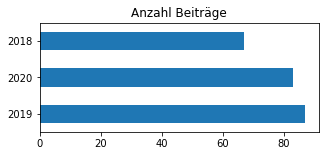

In [16]:
df['Jahr'].value_counts().plot(kind='barh', figsize=(5, 2), title='Anzahl Beiträge')

In [17]:
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')
df['Periode'] = df['Datum'].astype('datetime64[M]')

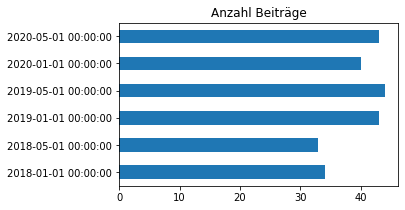

In [18]:
df['Periode'].value_counts().sort_index().plot(kind='barh', figsize=(5, 3), title='Anzahl Beiträge')

## Autorinnen und Autoren: Wer schreibt die Texte?

**Gesamtzeitraum**

Praktisch in der Hälfte aller Texte ist eine Frau in der Autorenzeile.

In [133]:
gr = df['Autorinnenzeile'].value_counts(normalize=True)
gr = gr.to_frame().sort_index().T
gr

,nur männlich,beides,nur weiblich
Autorinnenzeile,0.514563,0.131068,0.354369


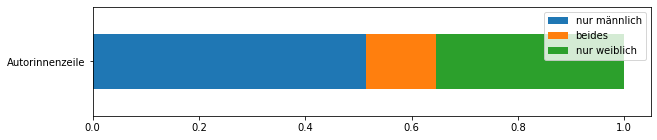

In [134]:
gr.plot(kind='barh', stacked=True, figsize=(10,2))

**pro Jahr**

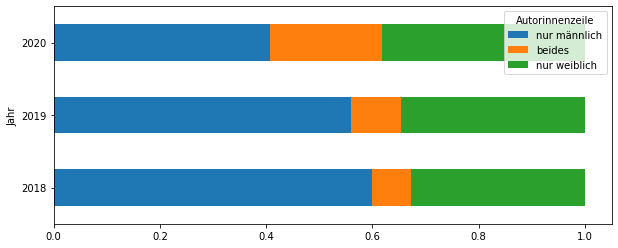

In [20]:
gr = df.groupby('Jahr')['Autorinnenzeile'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'Autorinnenzeile': 'value'}).reset_index()
gr = gr.pivot(index='Jahr', columns='Autorinnenzeile', values='value')
gr = gr[sorterAutorinnenzeile]
gr.plot(kind='barh', stacked=True, figsize=(10,4))

**pro Periode**

Der Anteil Texte, der ausschliesslich von männlichen Autoren geschrieben wird, ist von 60% auf unter 40% gefallen. Es gibt nicht mehr Texte von Frauen aber mehr Texte von gemischten Teams.

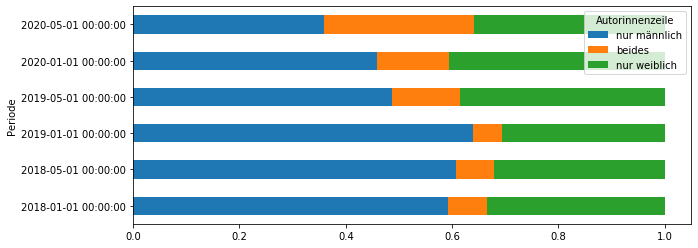

In [21]:
gr = df.groupby('Periode')['Autorinnenzeile'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'Autorinnenzeile': 'value'}).reset_index()
gr = gr.pivot(index='Periode', columns='Autorinnenzeile', values='value')
gr = gr[sorterAutorinnenzeile]
gr.plot(kind='barh', stacked=True, figsize=(10,4))

## Hat es Frauen im Text?

**im ganzen Zeitraum**

In fast drei Vierteln aller Republik-Texte kommt eine Frau vor.

In [136]:
df['hatFrauen'].value_counts(normalize=True)['Ja']

0.7339449541284404

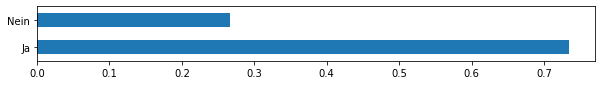

In [22]:
gr = df['hatFrauen'].value_counts(normalize=True)
gr.plot(kind='barh', figsize=(10,1))

**nach Jahr**

Der Anteil der Texte, in denen eine Frau vorkommt, ist von knapp 60% auf fast 80% gestiegen.

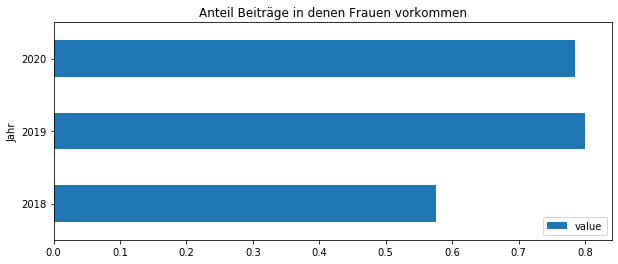

In [23]:
gr = df.groupby('Jahr')['hatFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatFrauen': 'value'}).reset_index()
gr = gr[gr['hatFrauen'] == 'Ja'][['Jahr', 'value']]
gr.plot(x='Jahr', y='value', kind='barh', stacked=True, figsize=(10,4), title='Anteil Beiträge in denen Frauen vorkommen')

**nach Periode**

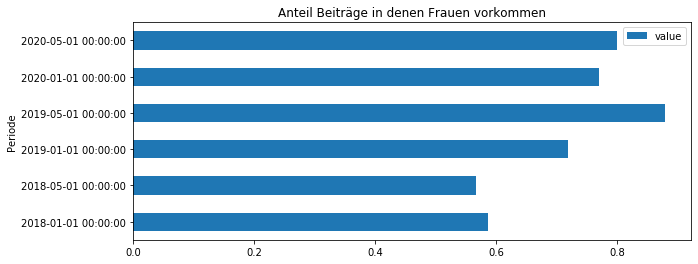

In [24]:
gr = df.groupby('Periode')['hatFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatFrauen': 'value'}).reset_index()
gr = gr[gr['hatFrauen'] == 'Ja'][['Periode', 'value']]
gr.plot(x='Periode', y='value', kind='barh', stacked=True, figsize=(10,4), title='Anteil Beiträge in denen Frauen vorkommen')

**nach Geschlecht**

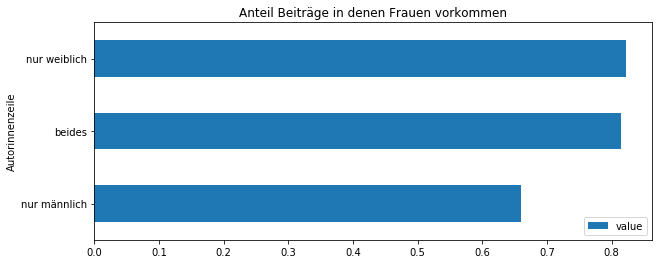

In [36]:
gr = df.groupby('Autorinnenzeile')['hatFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatFrauen': 'value'}).reset_index()
gr = gr[gr['hatFrauen'] == 'Ja'][['Autorinnenzeile', 'value']]
gr.plot(x='Autorinnenzeile', y='value', kind='barh', stacked=True, figsize=(10,4), title='Anteil Beiträge in denen Frauen vorkommen')

**nach Jahr und Geschlecht**

Männer, und inbesondere die gemischten Autorenteams haben die grössten "Fortschritte" beim Frauenanteil in den Texten erzielt.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f5e57f0>,
      dtype=object)

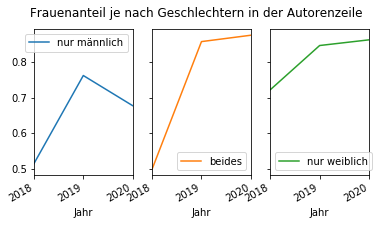

In [63]:
gr = df.groupby(['Autorinnenzeile', 'Jahr'])['hatFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatFrauen': 'value'}).reset_index()
gr = gr[gr['hatFrauen'] == 'Ja'][['Autorinnenzeile', 'Jahr', 'value']]
gr = gr.pivot(index='Jahr', columns='Autorinnenzeile', values='value')
gr.plot(subplots=True, sharey=True, layout=(1, 3), figsize=(6, 3), title='Frauenanteil je nach Geschlechtern in der Autorenzeile')

**nach Periode und Geschlecht**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f471f60>,
      dtype=object)

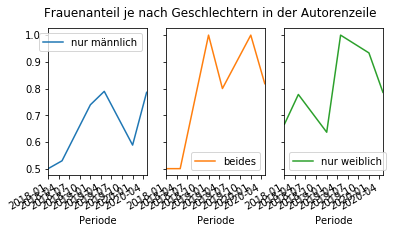

In [62]:
gr = df.groupby(['Autorinnenzeile', 'Periode'])['hatFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatFrauen': 'value'}).reset_index()
gr = gr[gr['hatFrauen'] == 'Ja'][['Autorinnenzeile', 'Periode', 'value']]
gr = gr.pivot(index='Periode', columns='Autorinnenzeile', values='value')
gr.plot(subplots=True, sharey=True, layout=(1, 3), figsize=(6,3), title='Frauenanteil je nach Geschlechtern in der Autorenzeile')

## Kommen Frauen in tragender Rolle vor?

**im ganzen Zeitraum**

In [139]:
df['hatTragendeFrauen'].value_counts(normalize=True)['Ja']

0.3348623853211009

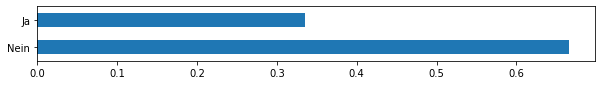

In [32]:
gr = df['hatTragendeFrauen'].value_counts(normalize=True)
gr.plot(kind='barh', figsize=(10,1))

**nach Jahr**

Der Anteil der Texte, in denen Frauen in "tragender Rolle" vorkommen, hat sich von 2018 bis 2020 praktisch verdoppelt von gut 20 auf fast 50%.

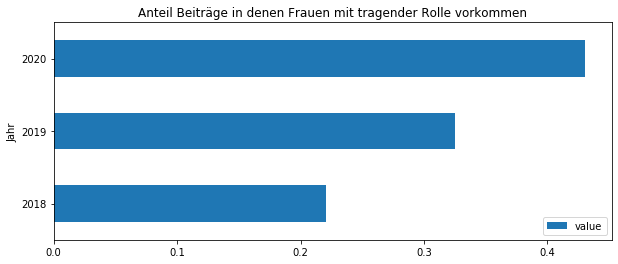

In [33]:
gr = df.groupby('Jahr')['hatTragendeFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatTragendeFrauen': 'value'}).reset_index()
gr = gr[gr['hatTragendeFrauen'] == 'Ja'][['Jahr', 'value']]
gr.plot(x='Jahr', y='value', kind='barh', stacked=True, figsize=(10,4), title='Anteil Beiträge in denen Frauen mit tragender Rolle vorkommen')

**nach Periode**

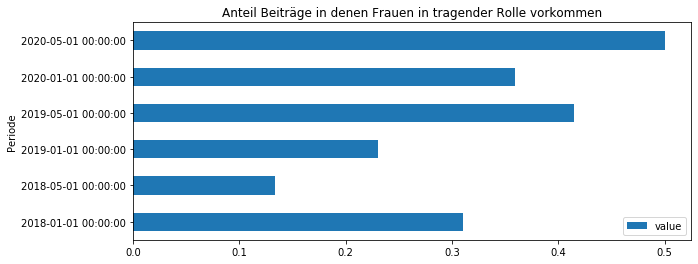

In [34]:
gr = df.groupby('Periode')['hatTragendeFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatTragendeFrauen': 'value'}).reset_index()
gr = gr[gr['hatTragendeFrauen'] == 'Ja'][['Periode', 'value']]
gr.plot(x='Periode', y='value', kind='barh', stacked=True, figsize=(10,4), title='Anteil Beiträge in denen Frauen in tragender Rolle vorkommen')

In [35]:
# Januar 2018 auch hier noch nicht richtig kategorisiert

**nach Geschlecht**

Bei weiblichen und gemischten Autorenteams kommen Frauen mehr als doppelt so häufig in "tragenden Rollen" vor

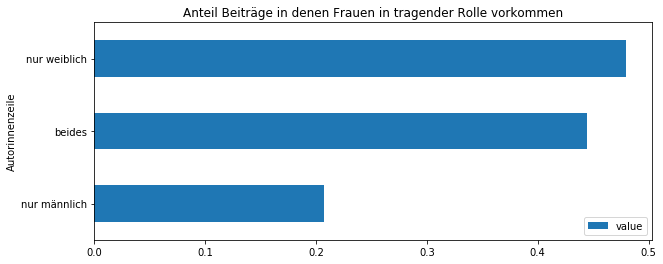

In [39]:
gr = df.groupby('Autorinnenzeile')['hatTragendeFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatTragendeFrauen': 'value'}).reset_index()
gr = gr[gr['hatTragendeFrauen'] == 'Ja'][['Autorinnenzeile', 'value']]
gr.plot(x='Autorinnenzeile', y='value', kind='barh', stacked=True, figsize=(10,4), title='Anteil Beiträge in denen Frauen in tragender Rolle vorkommen')

**nach Jahr und Geschlecht**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f894e80>,
      dtype=object)

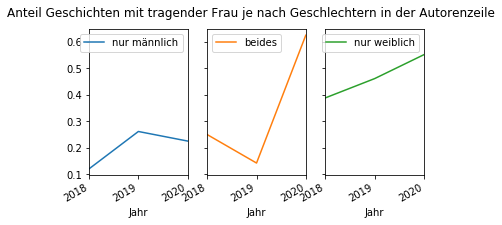

In [65]:
gr = df.groupby(['Autorinnenzeile', 'Jahr'])['hatTragendeFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatTragendeFrauen': 'value'}).reset_index()
gr = gr[gr['hatTragendeFrauen'] == 'Ja'][['Autorinnenzeile', 'Jahr', 'value']]
gr = gr.pivot(index='Jahr', columns='Autorinnenzeile', values='value')
gr.plot(subplots=True, sharey=True, layout=(1, 3), figsize=(6, 3), title='Anteil Geschichten mit tragender Frau je nach Geschlechtern in der Autorenzeile')

**nach Periode und Geschlecht**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fb9f6d8>,
      dtype=object)

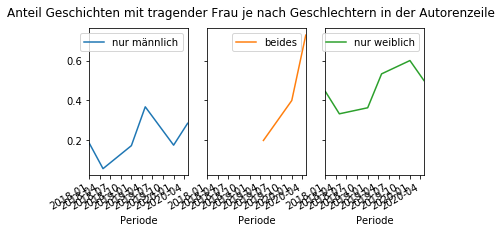

In [67]:
gr = df.groupby(['Autorinnenzeile', 'Periode'])['hatTragendeFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatTragendeFrauen': 'value'}).reset_index()
gr = gr[gr['hatTragendeFrauen'] == 'Ja'][['Autorinnenzeile', 'Periode', 'value']]
gr = gr.pivot(index='Periode', columns='Autorinnenzeile', values='value')
gr.plot(subplots=True, sharey=True, layout=(1, 3), figsize=(6,3), title='Anteil Geschichten mit tragender Frau je nach Geschlechtern in der Autorenzeile')

## Welche Rollen nehmen Frauen im Text ein? (Verteilung)

Diese Grafiken sagen tendenziell nicht so viel aus, schwierig zu interpretieren und merkwürdiger Verlauf über die Zeit.

**im gesamten Zeitraum**

In [159]:
gr = df['RolleFrauen'].value_counts(normalize=True)
gr = gr.to_frame().sort_index().T
#gr.plot(kind='barh', stacked=True, figsize=(10,2), title='Rolle der Frauen: Verteilung über alle Artikel')

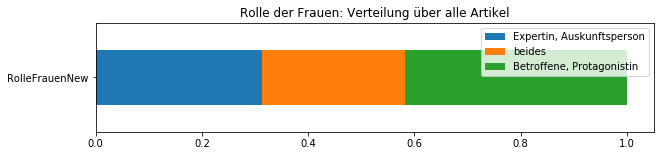

In [160]:
gr = df['RolleFrauenNew'].value_counts(normalize=True)
gr = gr.to_frame().sort_index().T
gr.plot(kind='barh', stacked=True, figsize=(10,2), title='Rolle der Frauen: Verteilung über alle Artikel')

**Gegenüberstellung mit Männern**

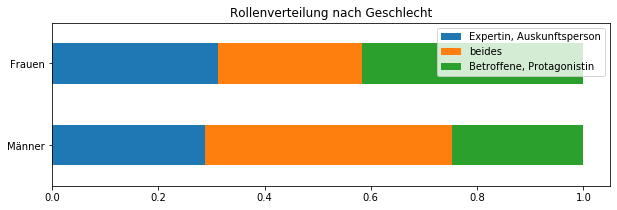

In [180]:
gr_f = df['RolleFrauenNew'].value_counts(normalize=True)
gr_m = df['RolleMännerNew'].value_counts(normalize=True)

gr = pd.DataFrame({'Männer': gr_m, 'Frauen': gr_f})
gr = gr.T
gr.plot(kind='barh', stacked=True, figsize=(10, 3), title='Rollenverteilung nach Geschlecht')

**nach Jahr**

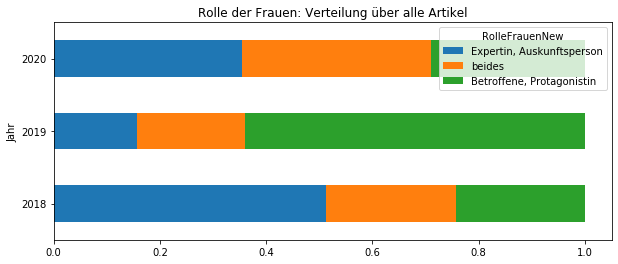

In [161]:
gr = df.groupby('Jahr')['RolleFrauenNew'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'RolleFrauenNew': 'value'}).reset_index()
gr = gr.pivot(index='Jahr', columns='RolleFrauenNew', values='value')
gr = gr[sorterRolleFrauen]
gr.plot(kind='barh', stacked=True, figsize=(10,4), title='Rolle der Frauen: Verteilung über alle Artikel')

**nach Periode**

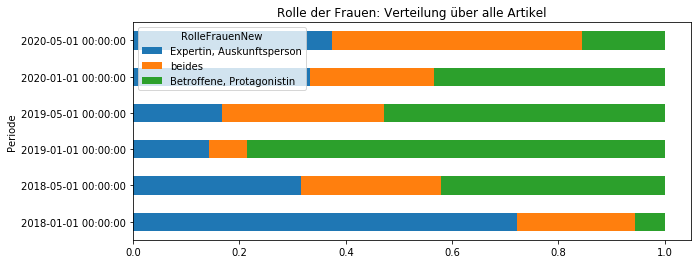

In [162]:
gr = df.groupby('Periode')['RolleFrauenNew'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'RolleFrauenNew': 'value'}).reset_index()
gr = gr.pivot(index='Periode', columns='RolleFrauenNew', values='value')
gr = gr[sorterRolleFrauen]
gr.plot(kind='barh', stacked=True, figsize=(10,4), title='Rolle der Frauen: Verteilung über alle Artikel')

In [30]:
# Im Januar 2018 wurde vermutliche etwas anders oder falsch kategorisiert!!

**nach Geschlecht**

Weibliche und männliche Autoren haben keinen systematisch unterschiedlichen Approach hinsichtlich der Rolle, in der Frauen im Text vorkommen. Nur minimal mehr "Expertinnen" bei gemischten Autorenteams und weiblichen Autoren.

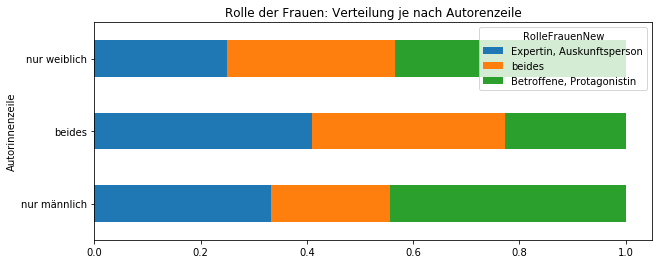

In [163]:
gr = df.groupby('Autorinnenzeile')['RolleFrauenNew'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'RolleFrauenNew': 'value'}).reset_index()
gr = gr.pivot(index='Autorinnenzeile', columns='RolleFrauenNew', values='value')
gr = gr[sorterRolleFrauen]
gr.plot(kind='barh', stacked=True, figsize=(10,4), title='Rolle der Frauen: Verteilung je nach Autorenzeile')

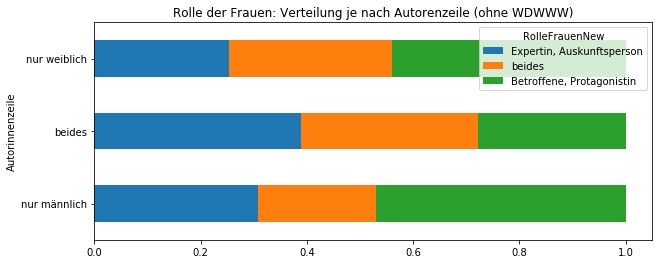

In [167]:
gr = df[df['Format'] != 'Was diese Woche wichtig war']

gr = gr.groupby('Autorinnenzeile')['RolleFrauenNew'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'RolleFrauenNew': 'value'}).reset_index()
gr = gr.pivot(index='Autorinnenzeile', columns='RolleFrauenNew', values='value')
gr = gr[sorterRolleFrauen]
gr.plot(kind='barh', stacked=True, figsize=(10,4), title='Rolle der Frauen: Verteilung je nach Autorenzeile (ohne WDWWW)')

## Wie oft sind Frauen eine Expertin? (Expertinnenquote Typ I)

**im gesamten Zeitraum**

In [106]:
df[['nFrauenProtagonisten', 'nFrauenExperten']].mean()

nFrauenProtagonisten    1.573394
nFrauenExperten         0.889908
dtype: float64

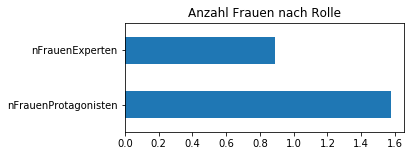

In [121]:
gr = df[['nFrauenProtagonisten', 'nFrauenExperten']].mean()
gr.plot(kind='barh', figsize=(5, 2), title='Anzahl Frauen nach Rolle')

**gegenüberstellung mit Männern**

Frauen kommen seltener in Texten vor, und wenn, dann sind sie typischerweise "Protagonistinnen". Bei Männern ist der Experten-Protagonisten-Anteil ziemlich ausgeglichen.

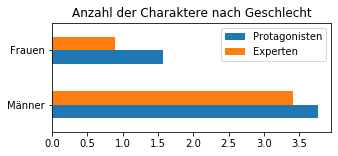

In [132]:
gr_m = df[['nMännerProtagonisten', 'nMännerExperten']].mean()
gr_m = gr_m.rename({'nMännerProtagonisten': 'Protagonisten', 'nMännerExperten': 'Experten'})

gr_f = df[['nFrauenProtagonisten', 'nFrauenExperten']].mean()
gr_f = gr_f.rename({'nFrauenProtagonisten': 'Protagonisten', 'nFrauenExperten': 'Experten'})

gr = pd.DataFrame({'Männer': gr_m, 'Frauen': gr_f})
gr = gr.T
gr.plot(kind='barh', figsize=(5, 2), title='Anzahl der Charaktere nach Geschlecht')

**nach Jahr**

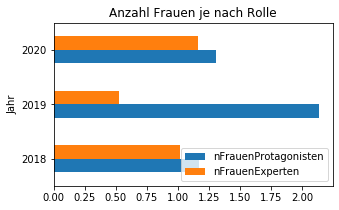

In [108]:
gr = df.groupby('Jahr')[['nFrauenProtagonisten', 'nFrauenExperten']].mean()
gr.plot(kind='barh', figsize=(5, 3), title='Anzahl Frauen je nach Rolle')

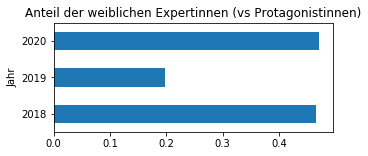

In [109]:
gr = df.groupby('Jahr')[['nFrauenProtagonisten', 'nFrauenExperten']].sum()
gr = gr['nFrauenExperten'] / gr.sum(axis=1)
gr.plot(kind='barh', figsize=(5,2), title='Anteil der weiblichen Expertinnen (vs Protagonistinnen)')

**nach Periode**

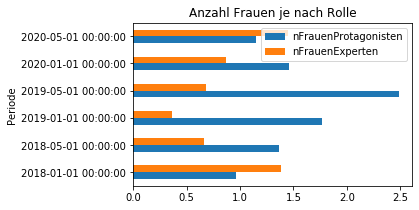

In [110]:
gr = df.groupby('Periode')[['nFrauenProtagonisten', 'nFrauenExperten']].mean()
gr.plot(kind='barh', figsize=(5, 3), title='Anzahl Frauen je nach Rolle')

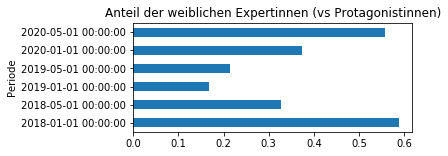

In [111]:
gr = df.groupby('Periode')[['nFrauenProtagonisten', 'nFrauenExperten']].sum()
gr = gr['nFrauenExperten'] / gr.sum(axis=1)
gr.plot(kind='barh', figsize=(5,2), title='Anteil der weiblichen Expertinnen (vs Protagonistinnen)')

**nach Geschlecht**

Weibliche Autorinnen erwähnen zwar öfters Frauen in ihren Texten. Doch die RollenVERTEILUNG ist bei weiblichen Autorinnen sehr ähnlich wie bei männlichen: Frauen erscheinen öfeters als Protagonistinnen, seltener als Expertinnen. Nur bei gemischten Teams ist es ausgeglichen.

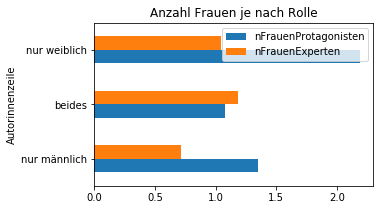

In [112]:
gr = df.groupby('Autorinnenzeile')[['nFrauenProtagonisten', 'nFrauenExperten']].mean()
gr.plot(kind='barh', figsize=(5, 3), title='Anzahl Frauen je nach Rolle')

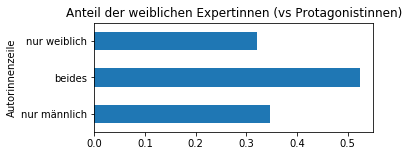

In [120]:
gr = df.groupby('Autorinnenzeile')[['nFrauenProtagonisten', 'nFrauenExperten']].sum()
gr = gr['nFrauenExperten'] / gr.sum(axis=1)
gr.plot(kind='barh', figsize=(5,2), title='Anteil der weiblichen Expertinnen (vs Protagonistinnen)')


**nach Jahr und Geschlecht des Autors**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1213ea9b0>,
      dtype=object)

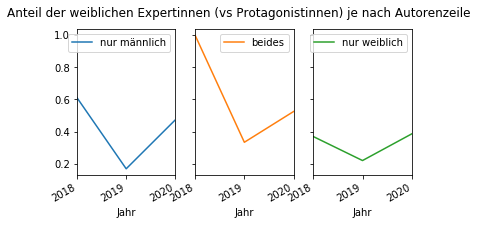

In [114]:
gr = df.groupby(['Autorinnenzeile', 'Jahr'])[['nFrauenProtagonisten', 'nFrauenExperten']].sum()
gr = gr['nFrauenExperten'] / gr.sum(axis=1)
gr = gr.to_frame().rename(columns={0: 'value'}).reset_index()
gr = gr.pivot(index='Jahr', columns='Autorinnenzeile', values='value')
gr.plot(subplots=True, sharey=True, layout=(1, 3), figsize=(6,3), title='Anteil der weiblichen Expertinnen (vs Protagonistinnen) je nach Autorenzeile')

**nach Periode und Geschlecht des Autors**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121551470>,
      dtype=object)

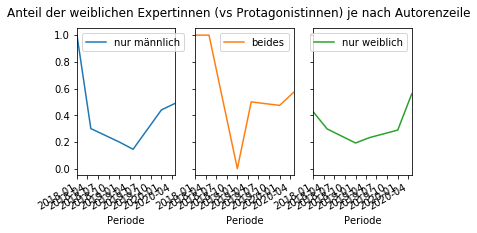

In [115]:
gr = df.groupby(['Autorinnenzeile', 'Periode'])[['nFrauenProtagonisten', 'nFrauenExperten']].sum()
gr = gr['nFrauenExperten'] / gr.sum(axis=1)
gr = gr.to_frame().rename(columns={0: 'value'}).reset_index()
gr = gr.pivot(index='Periode', columns='Autorinnenzeile', values='value')
gr.plot(subplots=True, sharey=True, layout=(1, 3), figsize=(6,3), title='Anteil der weiblichen Expertinnen (vs Protagonistinnen) je nach Autorenzeile')

## Wie häufig sind Experten weiblich? (Expertinnenquote Typ II)

**im gesamten Zeitraum**

Im Schnitt kommen fast viermal mehr männliche als weibliche "Experten" in den Texten vor. (allerdings dürfte diese Auswertung durch den Januar 2018 verzerrt sein!!!! siehe unten)

In [79]:
df[['nMännerExperten', 'nFrauenExperten']].mean()

nMännerExperten    3.417431
nFrauenExperten    0.889908
dtype: float64

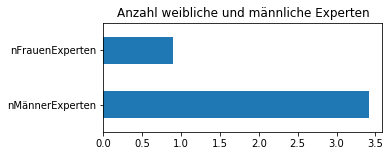

In [75]:
gr = df[['nMännerExperten', 'nFrauenExperten']].mean()
gr.plot(kind='barh', figsize=(5, 2), title='Anzahl weibliche und männliche Experten')

**nach Jahr**

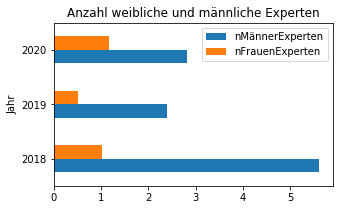

In [80]:
gr = df.groupby('Jahr')[['nMännerExperten', 'nFrauenExperten']].mean()
gr.plot(kind='barh', figsize=(5, 3), title='Anzahl weibliche und männliche Experten')

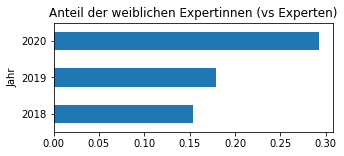

In [88]:
gr = df.groupby('Jahr')[['nMännerExperten', 'nFrauenExperten']].sum()
gr = gr['nFrauenExperten'] / gr.sum(axis=1)
gr.plot(kind='barh', figsize=(5,2), title='Anteil der weiblichen Expertinnen (vs Experten)')

**nach Periode**

Aktuell (Mai 2020) kommen etwas mehr als doppelt so viele männliche Experten (ca 3) gegenüber weiblichen Expertinnen (etwas mehr als 1) vor.

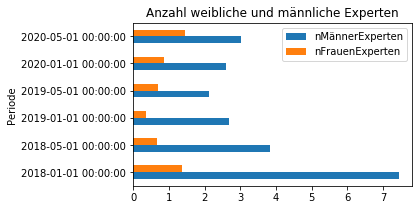

In [90]:
gr = df.groupby('Periode')[['nMännerExperten', 'nFrauenExperten']].mean()
gr.plot(kind='barh', figsize=(5, 3), title='Anzahl weibliche und männliche Experten')

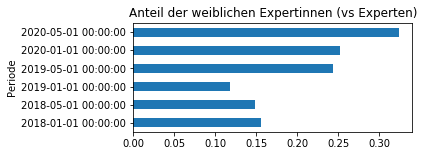

In [89]:
gr = df.groupby('Periode')[['nMännerExperten', 'nFrauenExperten']].sum()
gr = gr['nFrauenExperten'] / gr.sum(axis=1)
gr.plot(kind='barh', figsize=(5,2), title='Anteil der weiblichen Expertinnen (vs Experten)')

**nach Geschlecht**

Männliche Autoren erwähnen im Schnitt öfters männliche Experten... der Frauenanteil unter den Experten liegt bei männlichen Autoren nur bei 15%. Bei weiblichen Autorinnen liegt er bei fast 30%...

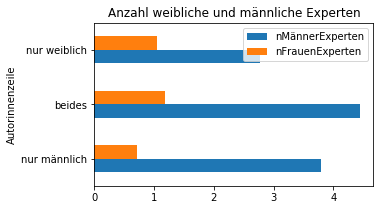

In [91]:
gr = df.groupby('Autorinnenzeile')[['nMännerExperten', 'nFrauenExperten']].mean()
gr.plot(kind='barh', figsize=(5, 3), title='Anzahl weibliche und männliche Experten')

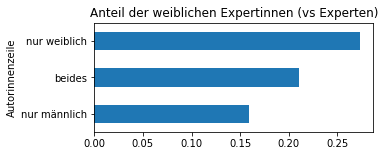

In [92]:
gr = df.groupby('Autorinnenzeile')[['nMännerExperten', 'nFrauenExperten']].sum()
gr = gr['nFrauenExperten'] / gr.sum(axis=1)
gr.plot(kind='barh', figsize=(5,2), title='Anteil der weiblichen Expertinnen (vs Experten)')

**nach Jahr und Geschlecht des Autors**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120b0c6a0>,
      dtype=object)

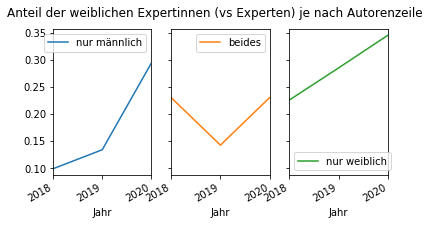

In [100]:
gr = df.groupby(['Autorinnenzeile', 'Jahr'])[['nMännerExperten', 'nFrauenExperten']].sum()
gr = gr['nFrauenExperten'] / gr.sum(axis=1)
gr = gr.to_frame().rename(columns={0: 'value'}).reset_index()
gr = gr.pivot(index='Jahr', columns='Autorinnenzeile', values='value')
gr.plot(subplots=True, sharey=True, layout=(1, 3), figsize=(6,3), title='Anteil der weiblichen Expertinnen (vs Experten) je nach Autorenzeile')

**nach Periode und Geschlecht**

Die männlichen Autoren erwähnen im Mai 2020 öfters weibliche Expertinnen als noch im Januar und Mai 2018. Damals lag der Expertinnen-Anteil nur bei 10%, inzwischen liegt er bei knapp 40%.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120974b70>,
      dtype=object)

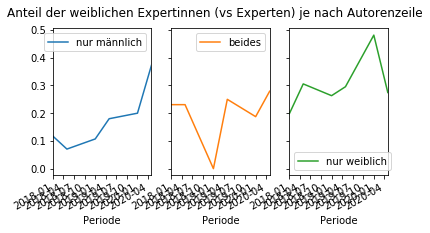

In [99]:
gr = df.groupby(['Autorinnenzeile', 'Periode'])[['nMännerExperten', 'nFrauenExperten']].sum()
gr = gr['nFrauenExperten'] / gr.sum(axis=1)
gr = gr.to_frame().rename(columns={0: 'value'}).reset_index()
gr = gr.pivot(index='Periode', columns='Autorinnenzeile', values='value')
gr.plot(subplots=True, sharey=True, layout=(1, 3), figsize=(6,3), title='Anteil der weiblichen Expertinnen (vs Experten) je nach Autorenzeile')